In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
fx_data = pd.read_excel('../data/fx_fixes.xlsx', sheet_name='LON_Fix', index_col=0)
fx_data = fx_data.pct_change()
fx_data['mkt'] = fx_data.mean(axis=1)
fx_data = fx_data['mkt']

In [4]:
factors = ['momentum', 'value', 'carry'] 
factorsdf = []
for factor in factors: 
    df = pd.read_excel('../data/factors_data.xlsx', sheet_name=factor, index_col=0)
    df.index = pd.to_datetime(df.index)
    factorsdf.append(df)

In [5]:
df = pd.concat(factorsdf, axis=1)
df.sort_index(inplace=True)
df.ffill(inplace=True)
df = df.reindex(factorsdf[1].index, method="ffill")

In [6]:
df = pd.concat(factorsdf, axis=1)
df.sort_index(inplace=True)
df.ffill(inplace=True)
df = df.reindex(factorsdf[1].index, method='ffill')
df.head()

,Citi Momentum FX Index,FX Value Index Barclays (G10),Bloomberg FX Carry Index
Date,,,
2023-11-20,3120.55,223.0863,238.001
2023-11-17,3120.55,223.0863,238.001
2023-11-16,3117.17,223.1735,238.780
2023-11-15,3117.17,222.3392,239.679
2023-11-14,3117.17,222.7197,239.348


In [7]:
factorsdf = df.sort_index()

In [8]:
pnl = pd.read_csv('../pnl.csv', index_col=0)
pnl.index = pd.to_datetime(pnl.index)
pnl = pnl.resample('d').sum()
pnl.index = pnl.index.map(lambda x: x.tz_localize(None))
pnl.sort_index(inplace=True)

pnl.tail()

,AUDUSD,DKKUSD,EURUSD,GBPUSD,NZDUSD,CADUSD,CHFUSD,JPYUSD,NOKUSD,SEKUSD,total,total_pct
Date,,,,,,,,,,,,
2023-11-11,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
2023-11-12,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
2023-11-13,45.713872,-895.124082,-27.873224,0.0,825.329746,15.875724,0.0,0.0,630.172237,1054.569104,1648.663377,0.001649
2023-11-14,3458.249765,1362.838472,-2012.430037,0.0,-6052.342819,-1108.599463,0.0,0.0,1215.470771,4247.401313,1110.588002,0.001111
2023-11-15,-15.266279,754.569434,-147.017478,0.0,40.990795,-23.108017,0.0,0.0,391.441022,-134.980608,866.628868,0.000867


<Axes: xlabel='Date'>

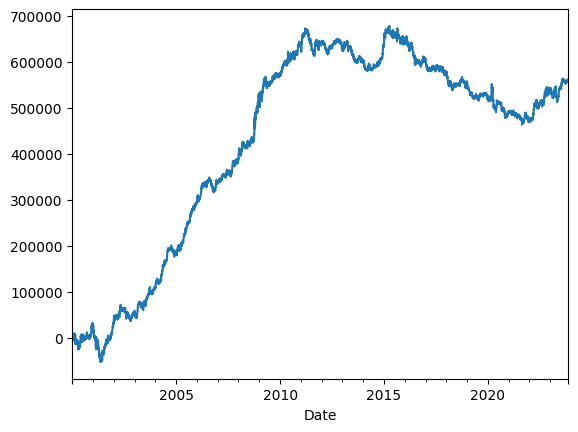

In [9]:
pnl['total'].cumsum().plot()

In [10]:
# factorsdf = factorsdf.reindex(pnl.index, method='ffill')
pnl = pnl.reindex(factorsdf.index, method='ffill')
factorsdf = factorsdf.pct_change()

In [11]:
pnl_pct = pnl['total_pct']
data = pd.concat([pnl_pct, factorsdf], axis=1)
data.columns = ["strategy_returns", "momentum", "value", "carry"]
data = data.merge(fx_data, left_index=True, right_index=True)
data.sort_index(inplace=True)

In [12]:
data.corr()
data.to_excel('factors_analysis.xlsx')

In [13]:
from statsmodels.api import OLS
import statsmodels.api as sm

In [15]:
data['strategy_returns']

Date
2002-01-25    0.001816
2002-01-28    0.001155
2002-01-29   -0.003047
2002-01-30   -0.000708
2002-01-31    0.001055
                ...   
2023-11-09   -0.002107
2023-11-10    0.001515
2023-11-13    0.001649
2023-11-14    0.001111
2023-11-15    0.000867
Name: strategy_returns, Length: 5359, dtype: float64

In [1]:
plt.hist(data['strategy_returns'], bins=50, density=True)

NameError: name 'plt' is not defined

In [17]:
X = data[['mkt', 'carry', 'value']]
X = sm.add_constant(X)
y = data['strategy_returns']

model = OLS(y, X, missing='drop')
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       strategy_returns   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     21.36
Date:                Thu, 23 Nov 2023   Prob (F-statistic):           9.49e-14
Time:                        22:32:08   Log-Likelihood:                 24757.
No. Observations:                5357   AIC:                        -4.951e+04
Df Residuals:                    5353   BIC:                        -4.948e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.378e-05   3.26e-05      2.878      0.0

<Axes: xlabel='mkt', ylabel='strategy_returns'>

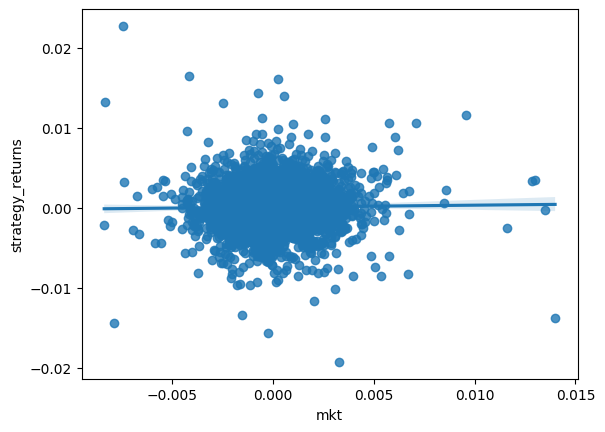

In [18]:
sns.regplot(x='mkt', y='strategy_returns', data=data)

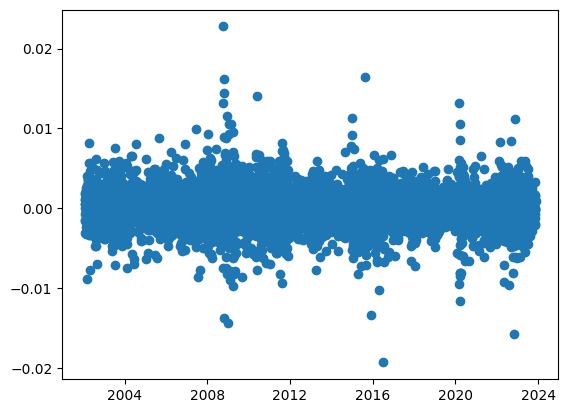

In [19]:
plt.scatter(data.index, data['strategy_returns'])

In [20]:
from sklearn.decomposition import PCA

In [25]:
pnl_pct

Date
2002-01-25    0.001816
2002-01-28    0.001155
2002-01-29   -0.003047
2002-01-30   -0.000708
2002-01-31    0.001055
                ...   
2023-11-14    0.001111
2023-11-15    0.000867
2023-11-16    0.000867
2023-11-17    0.000867
2023-11-20    0.000867
Name: total_pct, Length: 5362, dtype: float64

<Axes: xlabel='Date'>

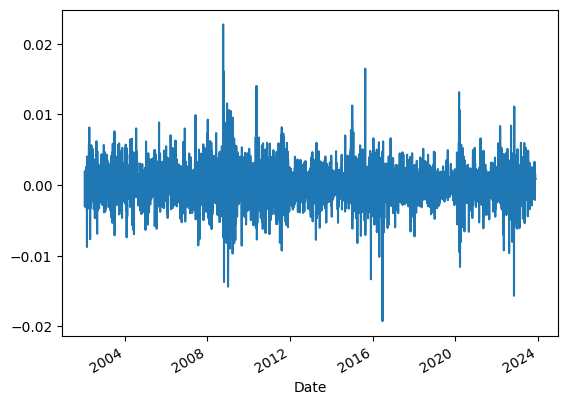

In [29]:
pnl_pct.plot()

In [32]:
pca = PCA(0.95, whiten=True, svd_solver='full')
pca.fit(pnl.drop(['total', 'total_pct'], axis=1))
print(pca.explained_variance_ratio_)
print(pca.singular_values_)
print(pca.components_)

[0.21421658 0.13829876 0.12697405 0.11266955 0.10443849 0.09137707
 0.07371716 0.06124312 0.04235025]
[97694.60160366 78497.01912939 75214.48973513 70851.21586941
 68214.1258185  63806.16639108 57309.72422729 52236.33166139
 43438.21815903]
[[-1.93656685e-01 -1.62227384e-01 -9.74305069e-02 -5.20424883e-02
  -6.00590769e-02 -3.78188129e-02 -3.92667442e-02  1.31131118e-03
   9.46970850e-01  1.43678448e-01]
 [ 1.69565258e-01 -2.54415759e-01 -1.20611946e-01 -1.17879849e-01
   2.14288541e-02 -1.18598728e-01 -6.05776113e-03 -4.02944908e-02
  -1.69849113e-01  9.12712127e-01]
 [ 5.12066940e-01 -6.29949482e-01 -2.55862139e-01  5.06470926e-02
   4.24464789e-01  7.46934034e-02  1.74313711e-02  4.55157210e-02
   4.74144160e-02 -2.87310661e-01]
 [ 3.59668727e-01  4.85575350e-01  1.71863033e-01 -2.73796030e-01
   4.96712934e-01 -5.03493570e-01  3.23043069e-04  3.80521438e-02
   1.68921037e-01  1.19129041e-02]
 [ 6.77060378e-01  1.14215876e-01  1.65720526e-02  1.53189778e-01
  -6.85899453e-01 -1.1517